# Introduction

In this project, I performed a **technical analysis of Bitcoin (BTC-USD)** using historical market data from the past two years.  
The objective was to retrieve, visualize, and analyze key market indicators in order to better understand price trends, trading volumes, and volatility.

I used **Yahoo Finance’s API** (via the `yfinance` Python library) to collect the data and applied several financial analysis techniques, including:

- **Price trend visualization**
- **Moving averages (SMA & EMA)**
- **Technical indicators (MACD, trading signals)**
- **Volatility analysis**
- **Volume-to-price correlation**
- **Monthly performance tracking**

This analysis is intended for **beginners in financial data science** who want to learn how to manipulate and analyze crypto market data with Python.


In [1]:
#pip install matplotlib

In [2]:
#pip install matplotlib --retries=5 --timeout=30

In [3]:
#pip install yfinance

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 0  Data loading

**I used the Yahoo Finance API via the yfinance library to fetch two years of Bitcoin (BTC-USD) market data, including open, high, low, close, and volume.**

In [2]:
btc = yf.Ticker("BTC-USD")
df = btc.history(period="2y")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-08-10 00:00:00+00:00,29563.972656,29688.564453,29354.447266,29429.591797,11865344789,0.0,0.0
2023-08-11 00:00:00+00:00,29424.902344,29517.773438,29253.517578,29397.714844,10195168197,0.0,0.0
2023-08-12 00:00:00+00:00,29399.787109,29465.113281,29357.587891,29415.964844,6194358008,0.0,0.0
2023-08-13 00:00:00+00:00,29416.593750,29441.433594,29265.806641,29282.914062,7329897180,0.0,0.0
2023-08-14 00:00:00+00:00,29283.263672,29660.253906,29124.105469,29408.443359,14013695304,0.0,0.0


# Step 1 : Plot the Closing Price (Close)

**I plotted the Bitcoin closing price over the entire period to get an initial overview of the market’s main trends.**

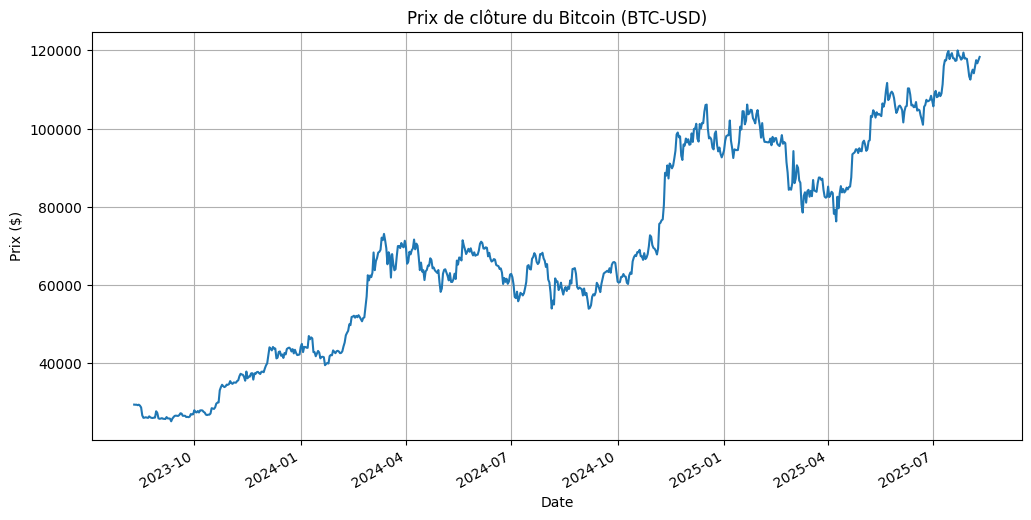

In [3]:
df['Close'].plot(figsize=(12, 6), title='Prix de clôture du Bitcoin (BTC-USD)')
plt.xlabel("Date")
plt.ylabel("Prix ($)")
plt.grid(True)
plt.show()

# Step 2 : Adding a Simple Moving Average (SMA)

**To smooth out fluctuations and detect trend signals, I calculated and visualized a 30-day Simple Moving Average (SMA) alongside the closing price.**

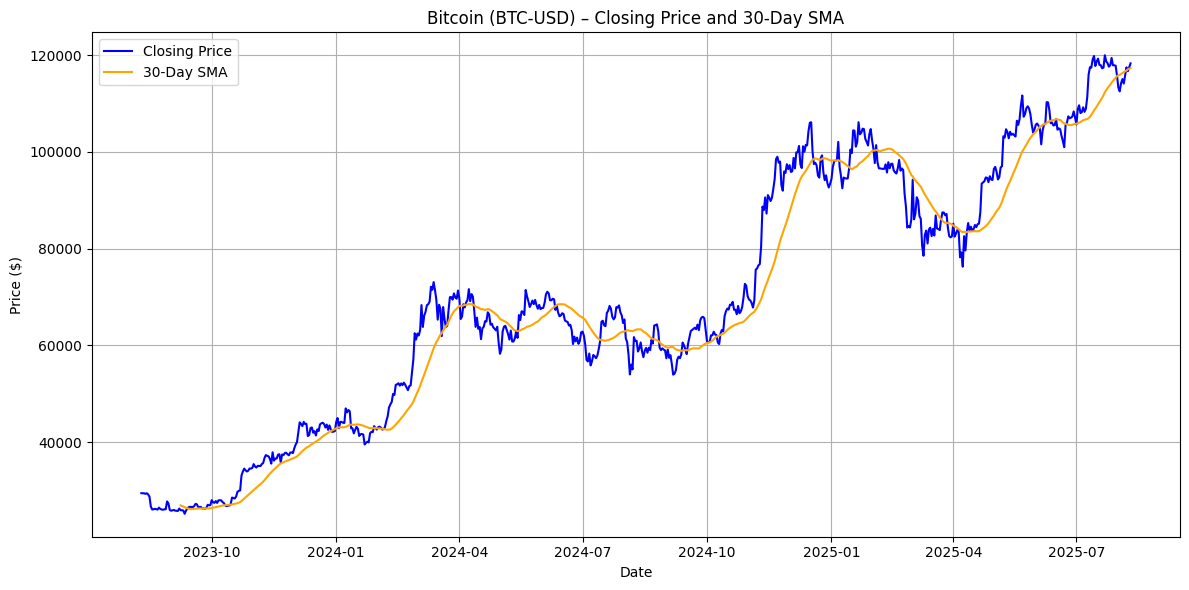

In [4]:
# Calculate 30-day SMA
df['SMA30'] = df['Close'].rolling(window=30).mean()

# Plot Closing Price + SMA30
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.plot(df.index, df['SMA30'], label='30-Day SMA', color='orange')
plt.title('Bitcoin (BTC-USD) – Closing Price and 30-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 3 : Displaying Trading Volumes

**To understand market activity and investor interest, I plotted the daily trading volumes of Bitcoin over the selected period. High spikes in volume often indicate strong buying or selling pressure.**

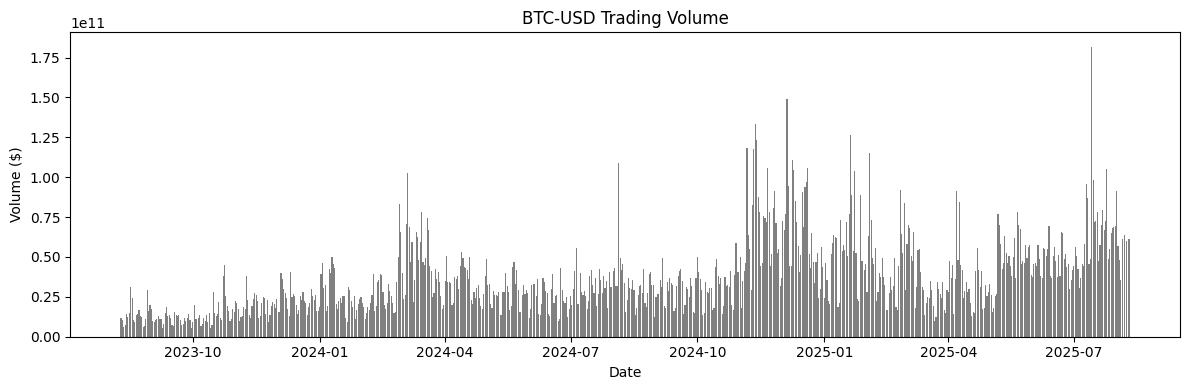

In [5]:
# Plot Trading Volume
plt.figure(figsize=(12, 4))
plt.bar(df.index, df['Volume'], color='gray')
plt.title("BTC-USD Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume ($)")
plt.tight_layout()
plt.show()

# Step 4 : Displaying Price and Volume Together

**To visualize the relationship between Bitcoin’s price movements and market activity, I plotted the closing price (with its 30-day SMA) and the trading volume on the same chart. This helps identify periods where price changes are accompanied by significant shifts in trading activity.**


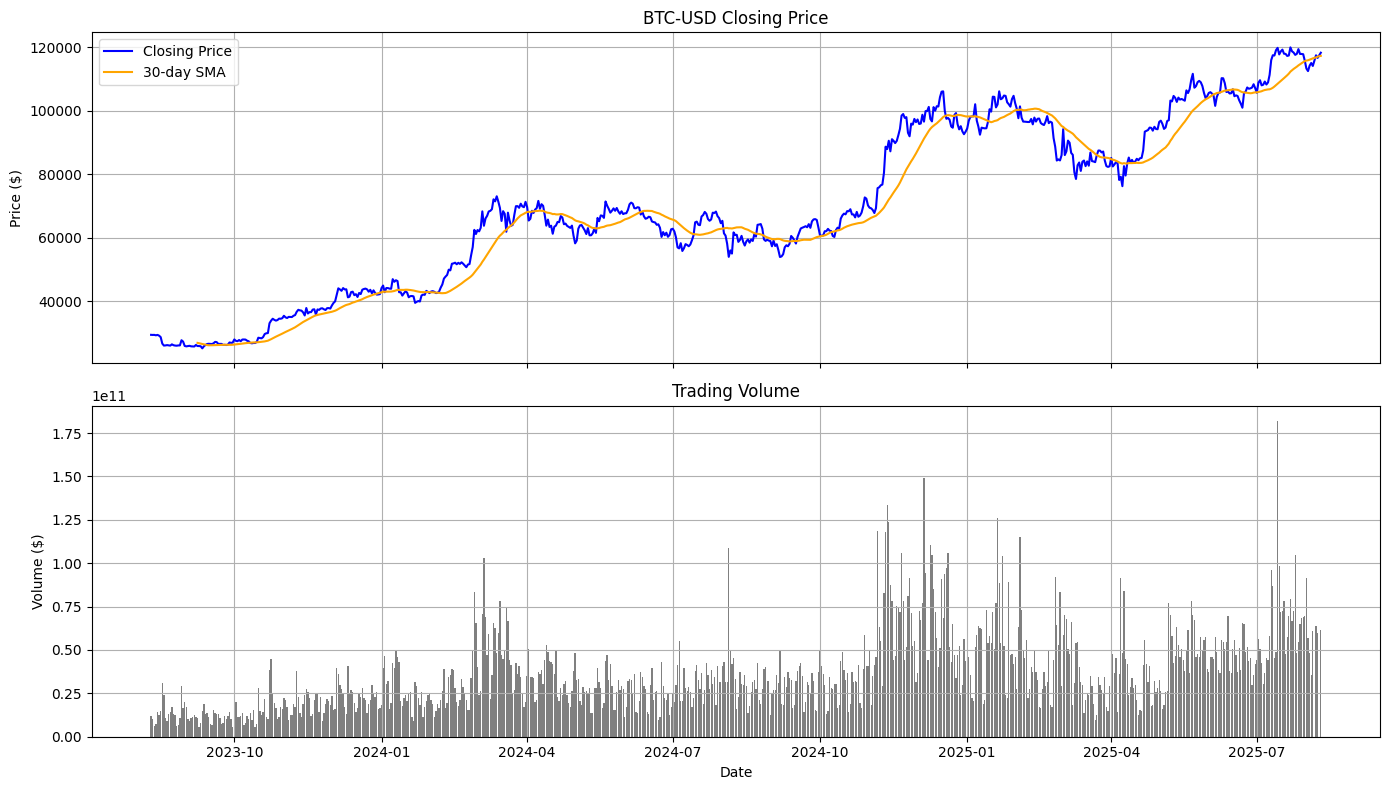

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Price chart
ax1.plot(df.index, df['Close'], label='Closing Price', color='blue')
ax1.plot(df.index, df['SMA30'], label='30-day SMA', color='orange')
ax1.set_title('BTC-USD Closing Price')
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True)

# Volume chart
ax2.bar(df.index, df['Volume'], color='gray')
ax2.set_title('Trading Volume')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume ($)')
ax2.grid(True)

plt.tight_layout()
plt.show()


# Step 5 : Zooming in on a Recent Period 

To get a closer look at short-term price movements, I focused on the most recent 30 days of Bitcoin data. This allows for a more detailed view of short-term fluctuations and how they interact with the 30-day SMA.

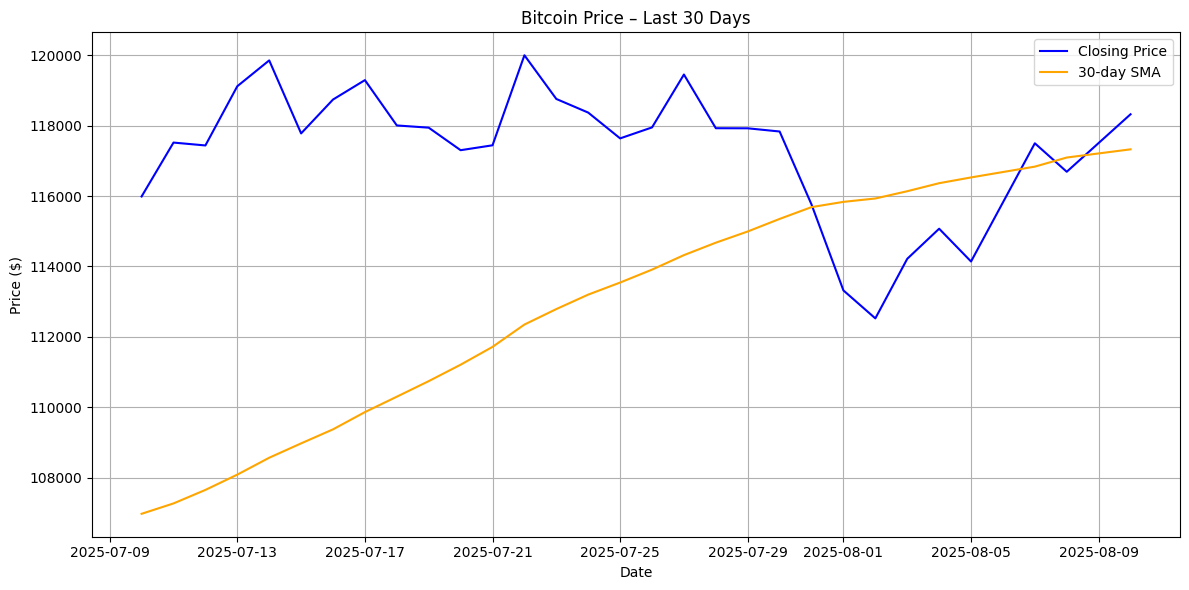

In [7]:
df_recent = df[-30:]  # Last 30 days
plt.figure(figsize=(12, 6))
plt.plot(df_recent.index, df_recent['Close'], label='Closing Price', color='blue')
plt.plot(df_recent.index, df_recent['SMA30'], label='30-day SMA', color='orange')
plt.title("Bitcoin Price – Last 30 Days")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 6 : Adding Technical Indicators

**To enhance the analysis, I added two Exponential Moving Averages (EMAs):**

**EMA 12 days: reacts faster to price changes and is useful for detecting short-term trends**

**EMA 26 days: slower and better suited for identifying medium-term trends.**

**These EMAs are often used together to generate trading signals, especially in the context of the MACD indicator.**

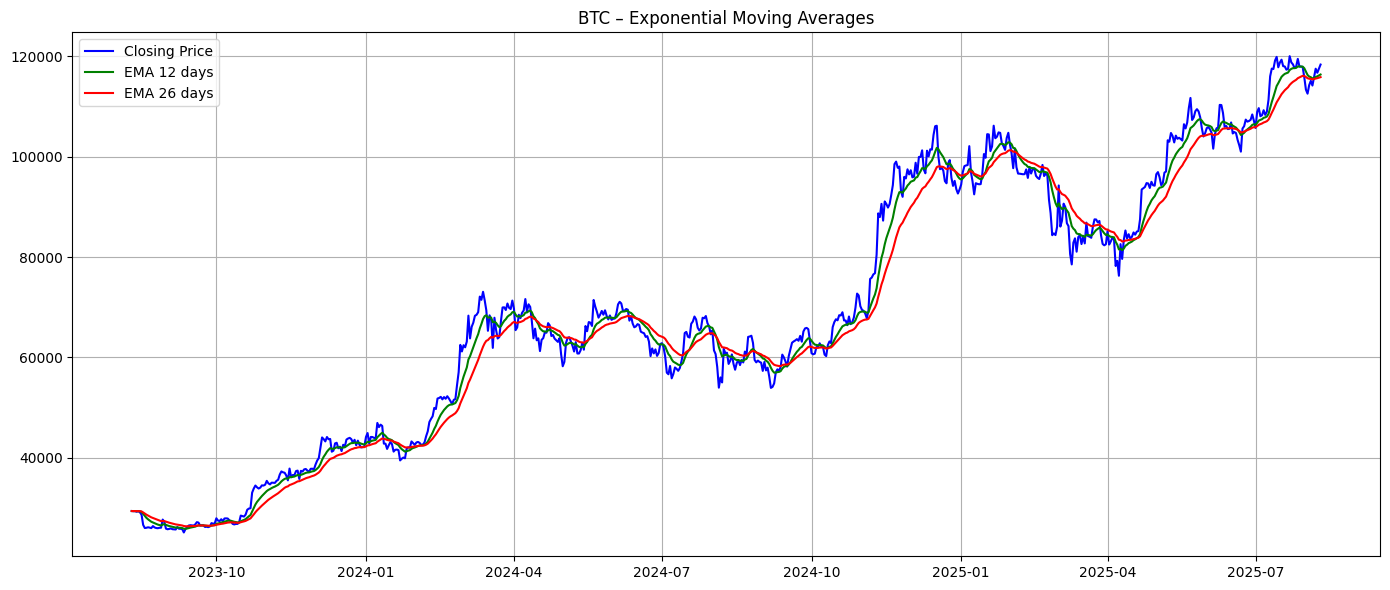

In [8]:
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.plot(df['EMA12'], label='EMA 12 days', color='green')
plt.plot(df['EMA26'], label='EMA 26 days', color='red')
plt.title("BTC – Exponential Moving Averages")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 7 : Calculating the MACD

**The MACD (Moving Average Convergence Divergence) is a popular technical indicator used to identify changes in momentum and potential trend reversals.**

**MACD Line = EMA(12) – EMA(26)**

**Signal Line = EMA(9) of the MACD line**

**A bullish signal occurs when the MACD crosses above the Signal line, and a bearish signal occurs when it crosses below.**

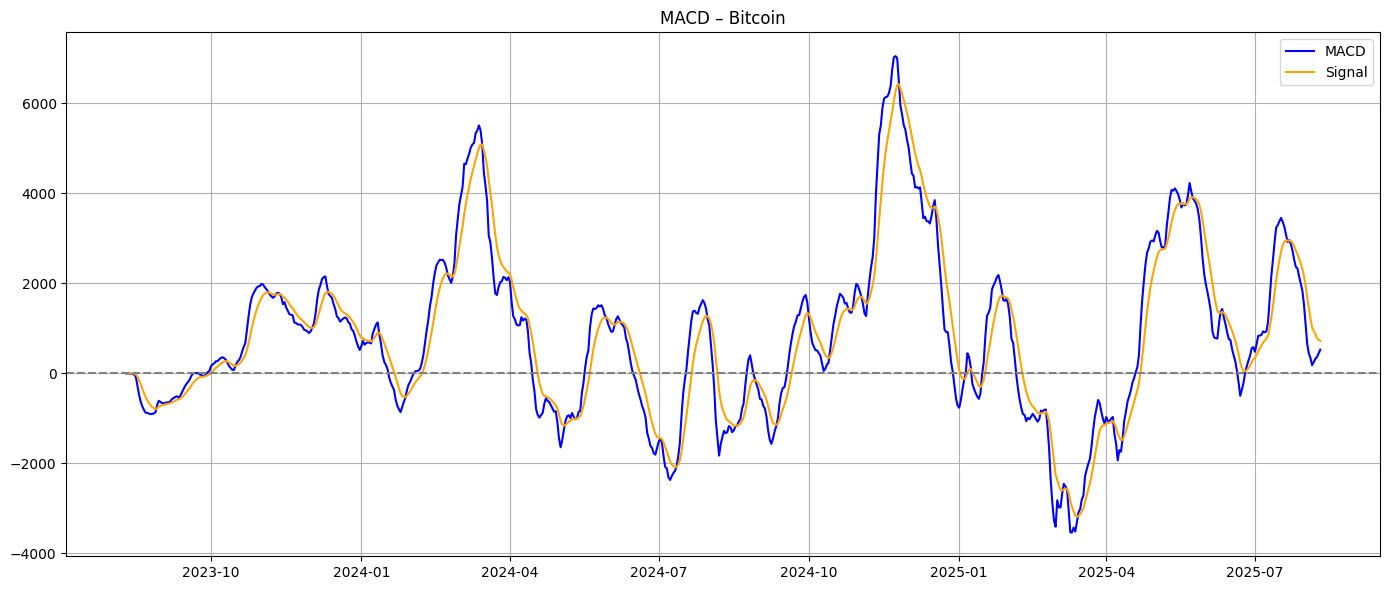

In [9]:
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['Signal'], label='Signal', color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.title("MACD – Bitcoin")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 8 : Identify Simple Buy and Sell Signals

**I generated basic trading signals using the crossovers between the MACD and the Signal line:**

**Bullish crossover (MACD crosses above the Signal line) → Buy signal ✅**

**Bearish crossover (MACD crosses below the Signal line) → Sell signal ❌**

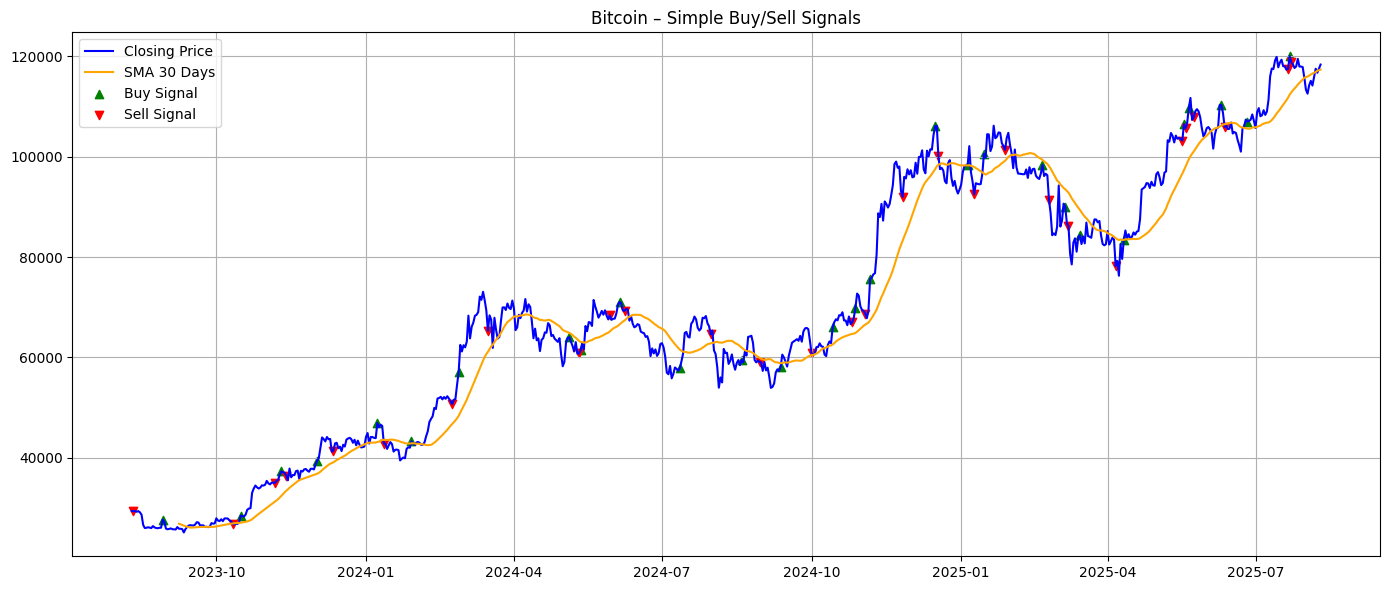

In [10]:
df['Buy_Signal'] = (df['MACD'] > df['Signal']) & (df['MACD'].shift(1) <= df['Signal'].shift(1))
df['Sell_Signal'] = (df['MACD'] < df['Signal']) & (df['MACD'].shift(1) >= df['Signal'].shift(1))

# Plot with signals
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.plot(df['SMA30'], label='SMA 30 Days', color='orange')

plt.scatter(df[df['Buy_Signal']].index, df[df['Buy_Signal']]['Close'], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(df[df['Sell_Signal']].index, df[df['Sell_Signal']]['Close'], marker='v', color='red', label='Sell Signal', alpha=1)

plt.title("Bitcoin – Simple Buy/Sell Signals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 9 : Volatility Calculation 

**I calculated the 7-day rolling volatility of Bitcoin as the standard deviation of daily percentage changes, expressed in percentage terms.
This helps measure how much the price fluctuates over a short period, giving insight into market risk and uncertainty.**

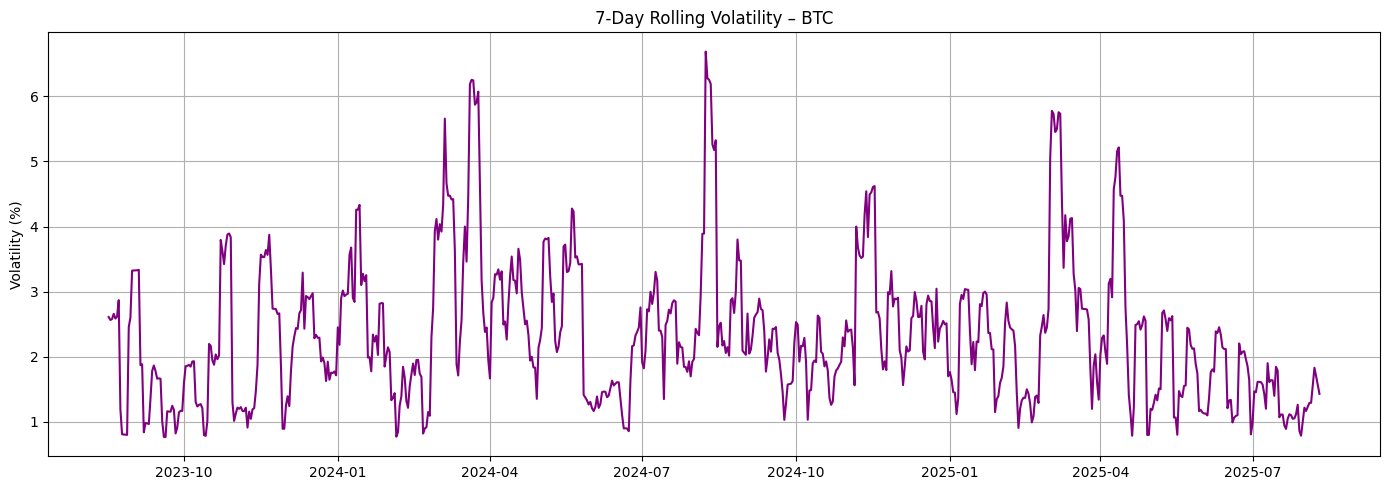

In [11]:
df['Volatility'] = df['Close'].pct_change().rolling(window=7).std() * 100

plt.figure(figsize=(14, 5))
plt.plot(df['Volatility'], color='purple')
plt.title("7-Day Rolling Volatility – BTC")
plt.ylabel("Volatility (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 10 : Correlation Between Volume & Price

**I explored the relationship between Bitcoin’s trading volume and closing price using a scatter plot and Pearson correlation coefficient.
A positive correlation means that higher volumes tend to be associated with higher prices, while a negative correlation suggests the opposite.**

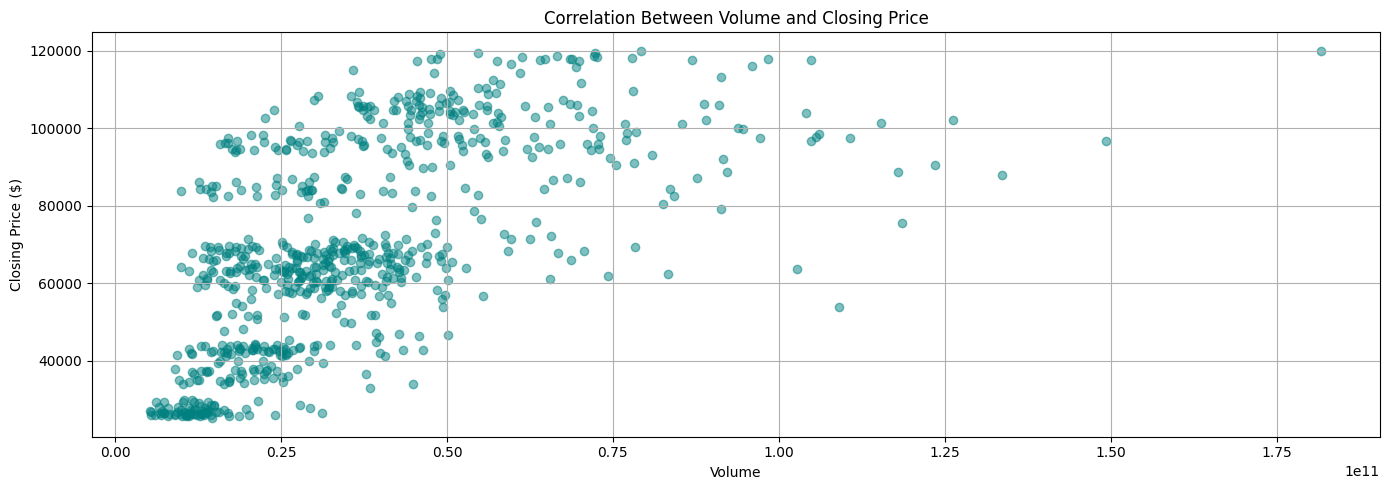

Volume – Price Correlation: 0.623


In [12]:
plt.figure(figsize=(14,5))
plt.scatter(df['Volume'], df['Close'], alpha=0.5, color='teal')
plt.title("Correlation Between Volume and Closing Price")
plt.xlabel("Volume")
plt.ylabel("Closing Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = df['Volume'].corr(df['Close'])
print("Volume – Price Correlation:", round(correlation, 3))


# Step 11 : Monthly Performance

**I calculated Bitcoin’s monthly percentage change in closing price to analyze its performance on a month-by-month basis.
This helps identify periods of strong growth or sharp declines and can reveal seasonal or cyclical patterns in the market.**

/var/folders/2c/syzk5kcx1570tt6mq588973r0000gn/T/ipykernel_92386/3894686276.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_perf = df['Close'].resample('M').last().pct_change() * 100


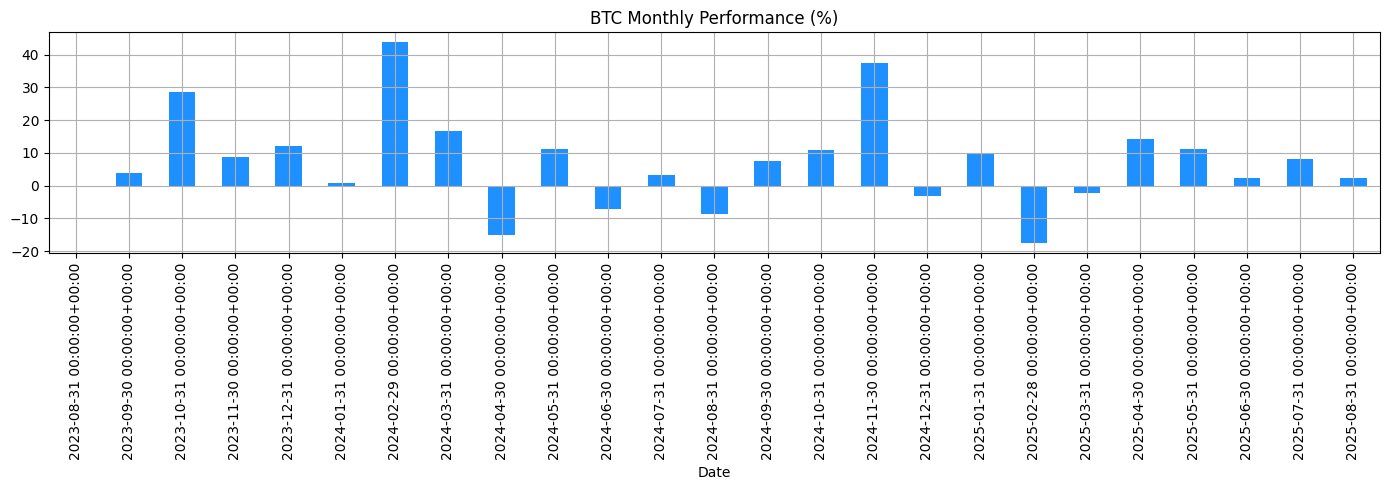

In [13]:
monthly_perf = df['Close'].resample('M').last().pct_change() * 100

plt.figure(figsize=(14,5))
monthly_perf.plot(kind='bar', color='dodgerblue')
plt.title("BTC Monthly Performance (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 12 : Export the Enriched Dataset

**After enriching the dataset with moving averages, MACD, volatility, and trading signals, I saved it to a CSV file so it can be reused for further analysis or modeling.**

In [14]:
df.to_csv("btc_analysis.csv")
print("Dataset successfully exported to BTC_enriched_dataset.csv")


Dataset successfully exported to BTC_enriched_dataset.csv


# Conclusion


This project provided a **step-by-step technical analysis** of Bitcoin over the past two years using Python.  
We covered essential concepts in market analysis:

- **Price visualization** to understand general trends  
- **Moving averages (SMA & EMA)** to smooth fluctuations and identify trends  
- **MACD indicator** and **simple buy/sell signals** to detect potential market entries and exits  
- **Volatility calculation** to measure market risk  
- **Volume-price correlation** to explore market activity patterns  
- **Monthly performance tracking** to evaluate returns over time  

Through this analysis, we demonstrated how to:
1. **Retrieve financial data** from Yahoo Finance  
2. **Clean and enrich the dataset** with new indicators  
3. **Visualize trends** using `matplotlib`  
4. **Export the enriched dataset** for further analysis or modeling  

The same approach can be applied to **stocks, ETFs, or other cryptocurrencies**, making it a flexible foundation for future trading strategies or machine learning models.
